# Fake Hashtag Word Clouds

### fake_hashtag_cloud.py and fake_hashtag_cloud_nocovid.py

In order to create the word clouds, we need the following packages:

In [1]:
import pandas as pd
import numpy as np
import json
#import sys
#import string
#import re
#from emot.emo_unicode import UNICODE_EMO, EMOTICONS
#import emoji
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
import nltk
from PIL import Image
import itertools
import altair as alt

To read the JSON file that has all the tweets, it is necessary to do:

In [2]:
data = []
with open('dataset/fakecovid_result_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

We have filtered all the hashtags:

In [3]:
index_covid=0
cmt_list_covid = []
for element in data:
    for entity in data[index_covid]['entities']['hashtags']:
        entity['text'] = entity['text'].lower()
        token_covid=entity['text']
        cmt_list_covid.append(token_covid)
        
    index_covid=index_covid+1

We have calculated the frequency distribution, displayed in the form of a bar chart showing the 15 most frequent hashtags within the dataset:

In [4]:
fdist_covid = dict(nltk.FreqDist(cmt_list_covid))
fdist_sorted = dict(sorted(fdist_covid.items(), key=lambda item: item[1], reverse=True))
#print(fdist_sorted)
out = dict(itertools.islice(fdist_sorted.items(), 15))

df = pd.DataFrame.from_dict(out, orient='index').reset_index()
df = df.rename(columns={'index':'hashtags', 0:'count'})
#print(df)
alt.renderers.enable('altair_viewer',inline=True)


alt.Chart(df, title="Most 15 frequent hashtag (WITH Covid terms) in the dataset").mark_bar().encode(
    x='count',
    y='hashtags',
    color=alt.value('blue'),
    opacity=alt.value(0.7)
    
)

alt.Chart(...)

The hashtag word cloud is generated:

In [5]:
mask_covid= np.array(Image.open('grafici/covid.jpg'))

wordcloud_covid = WordCloud(
                    mask=mask_covid,
                    width=mask_covid.shape[1],
                    height=mask_covid.shape[0],
                    background_color ='white', 
                    min_word_length = 3,
                    max_words=450,
                    font_path = 'grafici/GothamMedium.ttf',
                    min_font_size = 10).generate_from_frequencies(fdist_covid) 

Plot the hashtag word cloud (WITH terms regarding Covid):

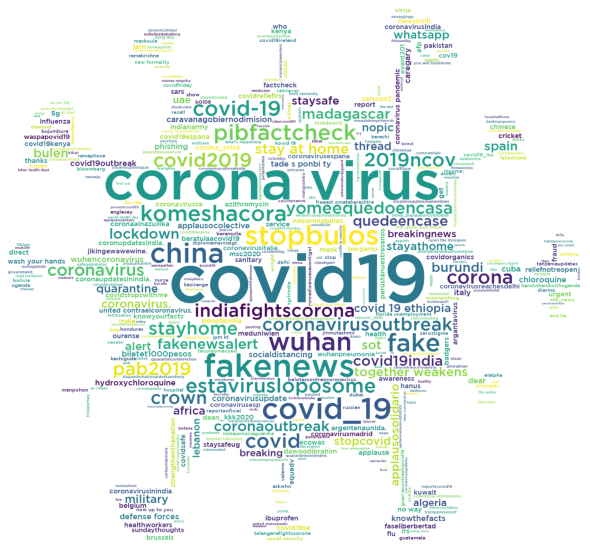

In [6]:
# Plot the Word Cloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_covid) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

We have also filtered all the hashtags without terms regarding Covid:

In [7]:
index=0
cmt_list = []
stopwords = ["2019ncov", "pandemic", "covid19", "indiafightscorona", "coronavirus", "sarscov2", "corona", "covid_19", "covid","coronavirusoutbreak","covid2019", "virus", "covid__19", "covidー19", "covid-19", "coronaviruspandemic", "covid19outbreak"]
for element in data:
    for entity in data[index]['entities']['hashtags']:
        entity['text'] = entity['text'].lower()
        entity['text'] = entity['text'].replace(" ", "")
        if entity['text'] not in stopwords:
            token=entity['text']
            cmt_list.append(token)
        
    index=index+1

We have calculated the frequency distribution, always displayed in the form of a bar chart showing the 15 most frequent hashtags (without Covid words) within the dataset:

In [8]:
fdist_hashtag = dict(nltk.FreqDist(cmt_list))
fdist_sorted_hashtag = dict(sorted(fdist_hashtag.items(), key=lambda item: item[1], reverse=True))
out_hashtag = dict(itertools.islice(fdist_sorted_hashtag.items(), 15))

df_hashtag = pd.DataFrame.from_dict(out_hashtag, orient='index').reset_index()
df_hashtag = df_hashtag.rename(columns={'index':'hashtags', 0:'count'})
alt.renderers.enable('altair_viewer',inline=True)


alt.Chart(df_hashtag, title="Most 15 frequent hashtag (WITHOUT Covid terms) in the dataset").mark_bar().encode(
    x='count',
    y='hashtags',
    color=alt.value('blue'),
    opacity=alt.value(0.7)
    
)

alt.Chart(...)

The hashtag word cloud is generated:

In [9]:
mask_nocovid= np.array(Image.open('grafici/speech_bubble.jpg'))

wordcloud_nocovid = WordCloud(
                        mask=mask_nocovid,
                        width=mask_nocovid.shape[1],
                        height=mask_nocovid.shape[0],
                        background_color ='white', 
                        min_word_length = 3,
                        font_path = 'grafici/GothamMedium.ttf',
                        min_font_size = 10).generate_from_frequencies(fdist_hashtag)

Plot the hashtag word cloud (WITHOUT terms regarding Covid):

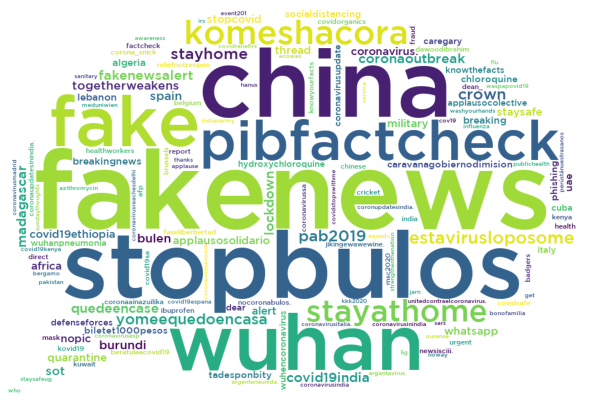

In [10]:
# Plot the Word Cloud image                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_nocovid) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 